In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from keras.callbacks import EarlyStopping

In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

print("X_train:", X_train.shape)
print("X_test:",X_test.shape)

X_train: (517893, 68)
X_test: (132703, 68)


In [53]:
# Definizione dell'input layer
input_dim = 68  # Numero di features per ciascun record
input_layer = tf.keras.Input(shape=(input_dim,))

encoder1 = tf.keras.layers.Dense(input_dim, activation='relu')(input_layer)
encoder2 = tf.keras.layers.Dense(int(input_dim/2), activation='relu')(encoder1)
encoder3 = tf.keras.layers.Dense(int(input_dim/4), activation='relu')(encoder2)

decoder1 = tf.keras.layers.Dense(int(input_dim/4), activation='relu')(encoder3)
decoder2 = tf.keras.layers.Dense(int(input_dim/2), activation='relu')(decoder1)
decoder3 = tf.keras.layers.Dense(input_dim, activation='relu')(decoder2)

output_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder3)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=output_layer)
optimizer = tf.keras.optimizers.Adam()

# Compilazione dell'autoencoder
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
# Stampa dell'architettura del modello
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 68)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 68)             │         4,692 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 34)             │         2,346 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 17)             │           595 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 17)             │           306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 34)             │           612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 68)             │         2,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 68)             │         4,692 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,623 (61.03 KB)

 Trainable params: 15,623 (61.03 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_split=0.2,  # Usa il 20% dei dati di training per la validazione
                callbacks=[early_stop])

Epoch 1/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0357 - val_loss: 0.0080
Epoch 2/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0059 - val_loss: 0.0078
Epoch 3/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0058 - val_loss: 0.0078
Epoch 4/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0058 - val_loss: 0.0077
Epoch 5/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0061 - val_loss: 0.0079
Epoch 6/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0059 - val_loss: 0.0080
Epoch 7/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0058 - val_loss: 0.0077
Epoch 8/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0058 - val_loss: 0.0077
Epoch 9/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0057 - val_loss: 0.0073
Epoch 10/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0060 - val_loss: 0.0089
Epoch 11/100
1619/1619 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0067 - val_loss: 0.0086
Epoch 12/100
1619/1

In [61]:
# Salvataggio del modello
autoencoder.save("autoencoder.keras")


In [55]:
# Calcola l'errore di ricostruzione
reconstructions = autoencoder.predict(X_test)
loss = np.mean(np.square(reconstructions - X_test), axis=1)

4147/4147 ━━━━━━━━━━━━━━━━━━━━ 3s 690us/step


In [ ]:
def curva_precision_recall(y_test, loss):
    precision, recall, thresholds_pr = precision_recall_curve(y_test, loss)
    auc_pr = auc(recall, precision)

    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_pr = thresholds_pr[np.argmax(f1_scores)]

    print("AUC-PR:", auc_pr)
    print("Best Threshold (Precision-Recall):", best_threshold_pr)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall Curve (AUC-PR = %0.2f)' % auc_pr, color='b')
    plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], color='red', marker='o', label='Best F1-Score')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()
    return best_threshold_pr

In [ ]:
def curva_roc(y_test,loss):
    fpr, tpr, thresholds_roc = roc_curve(y_test, loss)

    roc_auc = auc(fpr, tpr)

    optimal_threshold_index = np.argmax(tpr - fpr) #tpr-fpr è l'indice di Youden
    best_threshold_roc = thresholds_roc[optimal_threshold_index]

    print("AUC-ROC:", roc_auc)
    print("Best Threshold (ROC):", best_threshold_roc)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC-ROC = %0.2f)' % roc_auc, color='b')
    plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label='Optimal Threshold')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    return best_threshold_roc

In [58]:
def detect_anomaly(new_data, autoencoder, threshold):
    reconstructions = autoencoder.predict(new_data)
    loss = np.mean(np.square(reconstructions - new_data), axis=1)
    anomalies = loss >= threshold
    return anomalies

AUC-ROC: 0.927871627792471
Best Threshold (ROC): 0.04478267447200653


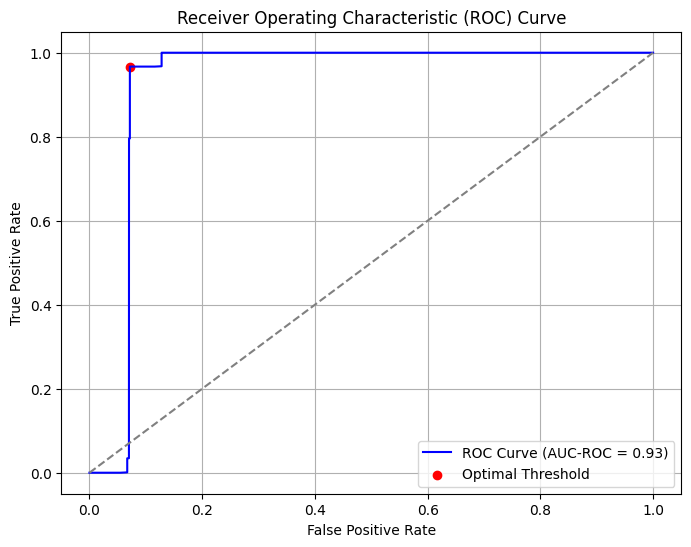

4147/4147 ━━━━━━━━━━━━━━━━━━━━ 3s 648us/step
AUC-PR: 0.15057238262098785
Best Threshold (Precision-Recall): 0.10386715987445957


C:\Users\fraia\AppData\Local\Temp\ipykernel_12472\3924243696.py:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


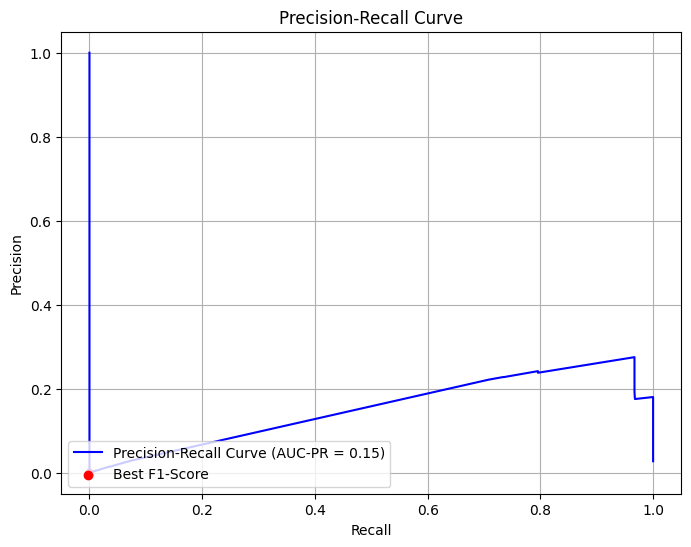

4147/4147 ━━━━━━━━━━━━━━━━━━━━ 3s 643us/step


In [59]:
threshold_roc=curva_roc(y_test,loss)
predicted_labels_roc = detect_anomaly(X_test, autoencoder, threshold_roc)

threshold_pr = curva_precision_recall(y_test, loss)
predicted_labels_pr = detect_anomaly(X_test, autoencoder, threshold_pr)

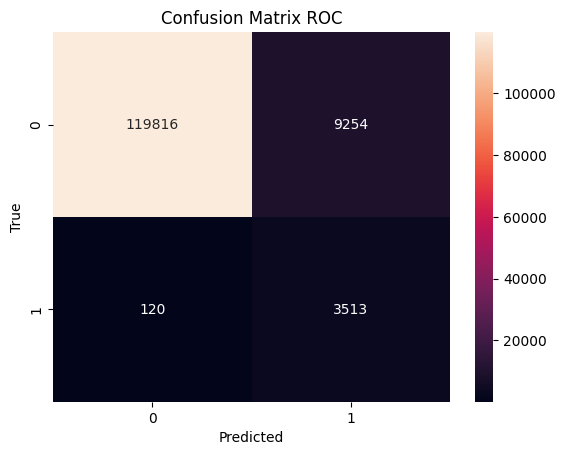

              precision    recall  f1-score   support

       False       1.00      0.93      0.96    129070
        True       0.28      0.97      0.43      3633

    accuracy                           0.93    132703
   macro avg       0.64      0.95      0.70    132703
weighted avg       0.98      0.93      0.95    132703


Accuracy con roc: 0.9293610543846033


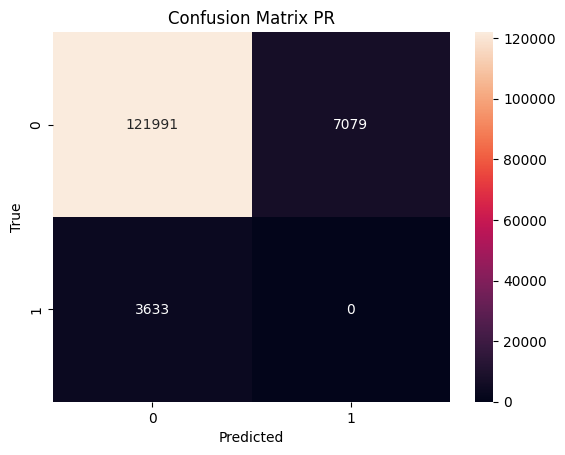

              precision    recall  f1-score   support

       False       0.97      0.95      0.96    129070
        True       0.00      0.00      0.00      3633

    accuracy                           0.92    132703
   macro avg       0.49      0.47      0.48    132703
weighted avg       0.94      0.92      0.93    132703


Accuracy con pr: 0.9192783885820215


In [ ]:
real_labels = y_test.to_numpy().astype(bool).flatten()

cm = confusion_matrix(real_labels, predicted_labels_roc)
sns.heatmap(cm, annot=True, fmt="d")    
plt.title("Confusion Matrix ROC")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(real_labels, predicted_labels_roc))
print("\nAccuracy con roc:", accuracy_score(real_labels, predicted_labels_roc))


cm = confusion_matrix(real_labels, predicted_labels_pr)
sns.heatmap(cm, annot=True, fmt="d")    
plt.title("Confusion Matrix PR")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(real_labels, predicted_labels_pr))
print("\nAccuracy con pr:", accuracy_score(real_labels, predicted_labels_pr))

In [ ]:
#FEATURES
reconstructions = autoencoder.predict(X_test)

feature_names = X_test.columns

reconstruction_errors = np.square(reconstructions - X_test) 

mean_feature_error = np.mean(reconstruction_errors, axis=0) 

feature_error_dict = dict(zip(feature_names, mean_feature_error))

sorted_feature_error = sorted(feature_error_dict.items(), key=lambda x: x[1], reverse=True) 

plt.figure(figsize=(10, 15))
plt.barh([x[0] for x in sorted_feature_error], [x[1] for x in sorted_feature_error])
plt.gca().invert_yaxis() 
plt.xlabel('Mean Reconstruction Error')
plt.ylabel('Feature Name')
plt.title('Mean Reconstruction Error for Each Feature')
plt.show()